In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d
from shapely.geometry import LineString

In [16]:
def generate_random_numbers():
    np.random.seed(25)
    num_numbers = 100
    random_numbers = np.random.normal(0, 1, num_numbers)
    for _ in tqdm(range(num_numbers), desc="Generating data", unit="number"):
        np.random.normal()

    return random_numbers

In [17]:
##df = pd.DataFrame(generate_random_numbers(), columns=['Data'])


Generating data: 100%|██████████| 100/100 [00:00<00:00, 100174.44number/s]


In [18]:
def plot_data(numbers_array):
    plt.plot(numbers_array, linestyle='-', color='b', label='Random Numbers')
    plt.show()


Generating data: 100%|██████████| 100/100 [00:00<?, ?number/s]


Generated data:


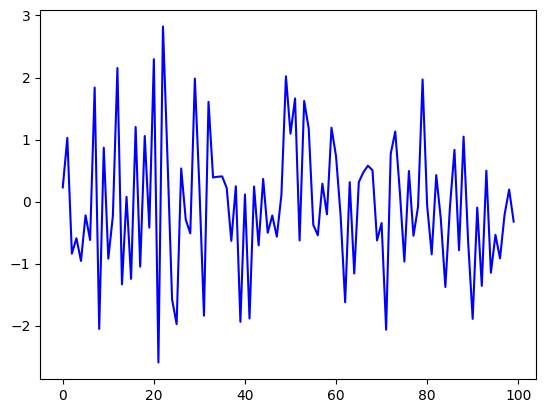

In [19]:
def main():
    numbers = generate_random_numbers()
    print("Generated data:")
    input("Press Enter to proceed.")
    graf = plot_data(numbers)

main()


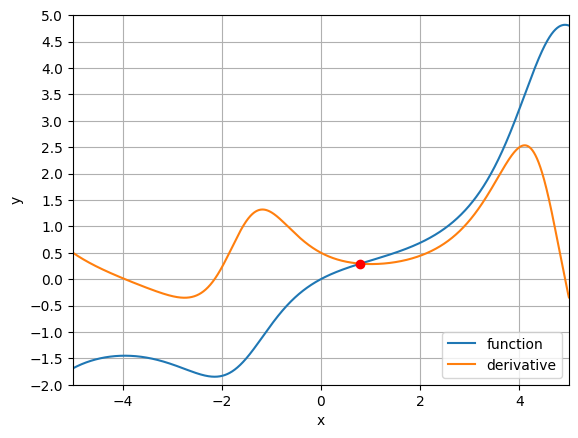

In [77]:
x = np.linspace(-5, 5, num=10000, endpoint=True)
y = x/(np.sin(x)+2)

dy = np.zeros(y.shape,dtype=float)
dy[0:-1] = np.diff(y)/np.diff(x)
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

xnew = np.linspace(-5, 5, num=10000, endpoint=True)

f_cubic = interp1d(x, y, kind='cubic')
f_cubic2 = interp1d(x, dy, kind='cubic')
line_1 = LineString(np.column_stack((xnew,f_cubic(xnew))))
line_2 = LineString(np.column_stack((xnew,f_cubic2(xnew))))
intersection = line_1.intersection(line_2)

plt.plot(xnew, f_cubic(xnew), '-', label='function')
plt.plot(xnew, f_cubic2(xnew), '-', label='derivative')
plt.plot(*intersection.xy, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.ylim([-2, 5])
plt.xlim([-5, 5])
plt.yticks(np.arange(-2,5.0001,0.5))
plt.legend(loc="lower right")


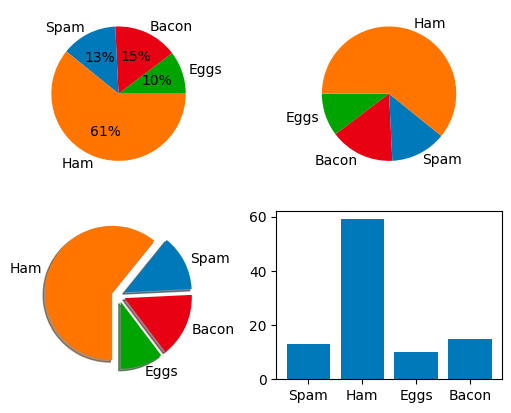

In [103]:
names = ["Eggs","Bacon","Spam","Ham"]
names_column = ["Spam","Ham","Eggs","Bacon"]
values = [13,59,10,15]
percentages = [0.1,0.15,0.13,0.59]

explode = (0.1, 0.1, 0.1, 0.1)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.pie(percentages,labels=names, autopct='%1.0f%%', colors=['#00A400', '#E80013', '#0079BA', '#FF7500'])

ax2.pie(percentages,labels=names, startangle=180, colors=['#00A400', '#E80013', '#0079BA', '#FF7500'])

ax3.pie(percentages,labels=names, explode=explode, shadow=True,
startangle=270, colors=['#00A400', '#E80013', '#0079BA', '#FF7500'])

ax4 = plt.bar(names_column, values, color ='#0079BA')

{'whiskers': [<matplotlib.lines.Line2D at 0x24e9f223a10>,
 'caps': [<matplotlib.lines.Line2D at 0x24e9f22c810>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e9f223410>,
 'medians': [<matplotlib.lines.Line2D at 0x24e9f22d4d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x24e9f22dc50>,
 'means': []}

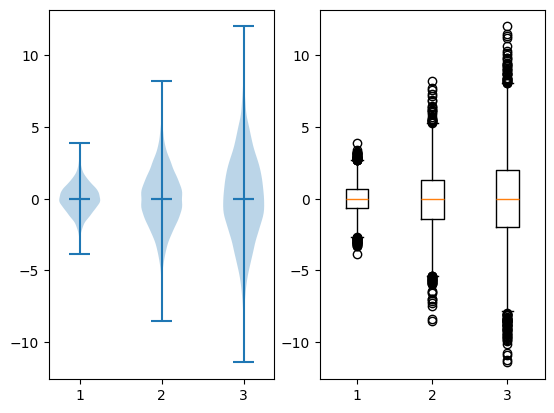

In [124]:
np.random.seed(507)
pos = [1, 2, 3]

data = [np.random.normal(0, std, size=10000) for std in pos]

fig, ((ax1, ax2)) = plt.subplots(1, 2)

ax1.violinplot(data,
showmeans=True, showextrema=True, showmedians=True)
ax2.boxplot(data)
